In [1]:
%matplotlib inline
import random
random.seed(0)
import numpy as np
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import seaborn as sns
from sklearn.base import TransformerMixin,BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import pairwise_distances
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib.legend_handler import HandlerLine2D
from sklearn.model_selection import train_test_split, KFold, cross_val_score, learning_curve, GridSearchCV, validation_curve

import timeit
from sklearn.mixture import GaussianMixture as GMM
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA, FastICA as ICA
from sklearn.random_projection import GaussianRandomProjection as GRP, SparseRandomProjection as RCA
from sklearn.ensemble import RandomForestClassifier
from itertools import product
from collections import defaultdict
from sklearn.metrics import  confusion_matrix,adjusted_rand_score
from sklearn.cluster import KMeans,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import homogeneity_score
from sklearn import metrics
from sklearn.decomposition import PCA,FastICA
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import optimizers

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

skips = 2
X_train=np.delete(X_train, list(range(0, X_train.shape[1], skips)), axis=1)
X_train=np.delete(X_train, list(range(0, X_train.shape[2], skips)), axis=2)
X_train = X_train.reshape(X_train.shape[0],-1)

X_test = np.delete(X_test, list(range(0, X_test.shape[1], skips)), axis=1)
X_test = np.delete(X_test, list(range(0, X_test.shape[2], skips)), axis=2)
X_test = X_test.reshape(X_test.shape[0],-1)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

idx_train = np.random.choice(60000, size = 10000, replace = False)
idx_test = np.random.choice(10000, size = 1000, replace = False)
X_train, y_train = X_train[idx_train], y_train[idx_train]
X_test, y_test = X_test[idx_test], y_test[idx_test]

/Users/khushhall/myEnv/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/khushhall/myEnv/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/khushhall/myEnv/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [3]:
class myGMM(GMM):
    def transform(self, X):
        return self.predict_proba(X)

## MLP with EM 

In [4]:
clusters =  [5, 10, 15, 20, 25, 30]
nn_arch=[(100),(100,100),(100,100,100), (100,100,100,100),(100,100,100,100,100)]

grid ={'gmm__n_components': clusters,'NN__hidden_layer_sizes':nn_arch}
mlp = MLPClassifier(max_iter=5000,early_stopping=True,random_state=5, learning_rate='adaptive')
gmm = myGMM(random_state=5)
pipe = Pipeline([('gmm', gmm), ('NN', mlp)])
gs = GridSearchCV(pipe,grid,verbose=10,cv=5)

gs.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] NN__hidden_layer_sizes=100, gmm__n_components=5 .................
[CV]  NN__hidden_layer_sizes=100, gmm__n_components=5, score=0.29790419161676646, total=  13.3s
[CV] NN__hidden_layer_sizes=100, gmm__n_components=5 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.5s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=100, gmm__n_components=5, score=0.2753623188405797, total=   9.8s
[CV] NN__hidden_layer_sizes=100, gmm__n_components=5 .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   23.5s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=100, gmm__n_components=5, score=0.2695, total=   6.6s
[CV] NN__hidden_layer_sizes=100, gmm__n_components=5 .................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   30.2s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=100, gmm__n_components=5, score=0.26413206603301653, total=   5.6s
[CV] NN__hidden_layer_sizes=100, gmm__n_components=5 .................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   36.0s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=100, gmm__n_components=5, score=0.2865731462925852, total=   9.2s
[CV] NN__hidden_layer_sizes=100, gmm__n_components=10 ................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   45.4s remaining:    0.0s


[CV]  NN__hidden_layer_sizes=100, gmm__n_components=10, score=0.45109780439121755, total=  18.4s
[CV] NN__hidden_layer_sizes=100, gmm__n_components=10 ................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.1min remaining:    0.0s


[CV]  NN__hidden_layer_sizes=100, gmm__n_components=10, score=0.4267866066966517, total=  17.1s
[CV] NN__hidden_layer_sizes=100, gmm__n_components=10 ................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.4min remaining:    0.0s


[CV]  NN__hidden_layer_sizes=100, gmm__n_components=10, score=0.3955, total=  18.4s
[CV] NN__hidden_layer_sizes=100, gmm__n_components=10 ................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.7min remaining:    0.0s


[CV]  NN__hidden_layer_sizes=100, gmm__n_components=10, score=0.4107053526763382, total=  25.2s
[CV] NN__hidden_layer_sizes=100, gmm__n_components=10 ................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.1min remaining:    0.0s


[CV]  NN__hidden_layer_sizes=100, gmm__n_components=10, score=0.45991983967935873, total=  21.9s
[CV] NN__hidden_layer_sizes=100, gmm__n_components=15 ................
[CV]  NN__hidden_layer_sizes=100, gmm__n_components=15, score=0.4880239520958084, total=  36.9s
[CV] NN__hidden_layer_sizes=100, gmm__n_components=15 ................
[CV]  NN__hidden_layer_sizes=100, gmm__n_components=15, score=0.42278860569715143, total=  33.8s
[CV] NN__hidden_layer_sizes=100, gmm__n_components=15 ................
[CV]  NN__hidden_layer_sizes=100, gmm__n_components=15, score=0.4425, total=  47.6s
[CV] NN__hidden_layer_sizes=100, gmm__n_components=15 ................
[CV]  NN__hidden_layer_sizes=100, gmm__n_components=15, score=0.45822911455727866, total=  41.2s
[CV] NN__hidden_layer_sizes=100, gmm__n_components=15 ................
[CV]  NN__hidden_layer_sizes=100, gmm__n_components=15, score=0.48547094188376755, total=  38.7s
[CV] NN__hidden_layer_sizes=100, gmm__n_components=20 ................
[CV]  

[CV]  NN__hidden_layer_sizes=(100, 100), gmm__n_components=30, score=0.4842421210605303, total=  59.6s
[CV] NN__hidden_layer_sizes=(100, 100), gmm__n_components=30 .........
[CV]  NN__hidden_layer_sizes=(100, 100), gmm__n_components=30, score=0.4909819639278557, total= 1.0min
[CV] NN__hidden_layer_sizes=(100, 100, 100), gmm__n_components=5 .....
[CV]  NN__hidden_layer_sizes=(100, 100, 100), gmm__n_components=5, score=0.3003992015968064, total=  11.5s
[CV] NN__hidden_layer_sizes=(100, 100, 100), gmm__n_components=5 .....
[CV]  NN__hidden_layer_sizes=(100, 100, 100), gmm__n_components=5, score=0.2753623188405797, total=  10.2s
[CV] NN__hidden_layer_sizes=(100, 100, 100), gmm__n_components=5 .....
[CV]  NN__hidden_layer_sizes=(100, 100, 100), gmm__n_components=5, score=0.269, total=   9.0s
[CV] NN__hidden_layer_sizes=(100, 100, 100), gmm__n_components=5 .....
[CV]  NN__hidden_layer_sizes=(100, 100, 100), gmm__n_components=5, score=0.26413206603301653, total=  13.5s
[CV] NN__hidden_layer_s

[CV]  NN__hidden_layer_sizes=(100, 100, 100, 100), gmm__n_components=15, score=0.47945891783567135, total=  34.4s
[CV] NN__hidden_layer_sizes=(100, 100, 100, 100), gmm__n_components=20 
[CV]  NN__hidden_layer_sizes=(100, 100, 100, 100), gmm__n_components=20, score=0.499001996007984, total=  41.6s
[CV] NN__hidden_layer_sizes=(100, 100, 100, 100), gmm__n_components=20 
[CV]  NN__hidden_layer_sizes=(100, 100, 100, 100), gmm__n_components=20, score=0.45027486256871563, total=  48.3s
[CV] NN__hidden_layer_sizes=(100, 100, 100, 100), gmm__n_components=20 
[CV]  NN__hidden_layer_sizes=(100, 100, 100, 100), gmm__n_components=20, score=0.4625, total=  35.3s
[CV] NN__hidden_layer_sizes=(100, 100, 100, 100), gmm__n_components=20 
[CV]  NN__hidden_layer_sizes=(100, 100, 100, 100), gmm__n_components=20, score=0.4527263631815908, total=  37.6s
[CV] NN__hidden_layer_sizes=(100, 100, 100, 100), gmm__n_components=20 
[CV]  NN__hidden_layer_sizes=(100, 100, 100, 100), gmm__n_components=20, score=0.49148

[CV]  NN__hidden_layer_sizes=(100, 100, 100, 100, 100), gmm__n_components=30, score=0.4792396198099049, total= 1.0min
[CV] NN__hidden_layer_sizes=(100, 100, 100, 100, 100), gmm__n_components=30 
[CV]  NN__hidden_layer_sizes=(100, 100, 100, 100, 100), gmm__n_components=30, score=0.4904809619238477, total= 1.1min


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed: 97.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('gmm', myGMM(covariance_type='full', init_params='kmeans', max_iter=100,
   means_init=None, n_components=1, n_init=1, precisions_init=None,
   random_state=5, reg_covar=1e-06, tol=0.001, verbose=0,
   verbose_interval=10, warm_start=False, weights_init=None)), ('NN', MLPClassifier(activatio...=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gmm__n_components': [5, 10, 15, 20, 25, 30], 'NN__hidden_layer_sizes': [100, (100, 100), (100, 100, 100), (100, 100, 100, 100), (100, 100, 100, 100, 100)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [5]:
tmp = pd.DataFrame(gs.cv_results_)
tmp.to_csv('mnist_em_nn.csv')

In [6]:
best_params = gs.best_params_
print("Best parameters set for Neural network:")
print(best_params)
pred_best = gs.predict(X_test)
best_accuracy = accuracy_score(y_test, pred_best)
print('Accuracy of Neural network: is %.2f%%' % (best_accuracy * 100))

Best parameters set for Neural network:
{'NN__hidden_layer_sizes': 100, 'gmm__n_components': 25}
Accuracy of Neural network: is 46.60%


In [7]:
print(classification_report(y_test, gs.predict(X_test)))

              precision    recall  f1-score   support

           0       0.54      0.54      0.54       105
           1       0.96      0.76      0.85       100
           2       0.76      0.38      0.51       108
           3       0.42      0.25      0.31       108
           4       0.31      0.04      0.07       109
           5       0.42      0.24      0.31        86
           6       0.75      0.89      0.82       103
           7       0.48      0.78      0.59       102
           8       0.19      0.54      0.28        93
           9       0.22      0.21      0.21        86

   micro avg       0.47      0.47      0.47      1000
   macro avg       0.50      0.46      0.45      1000
weighted avg       0.51      0.47      0.45      1000



In [8]:
# https://gist.github.com/hitvoice/36cf44689065ca9b927431546381a3f7
def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(15,15)):
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)

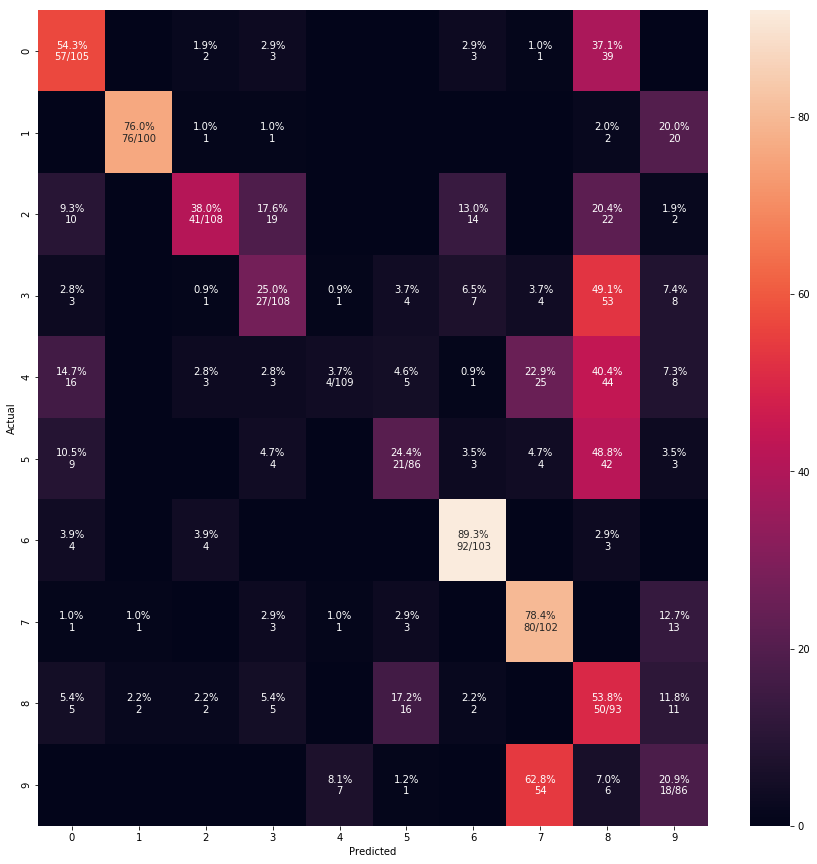

In [9]:
cm_analysis(y_test, gs.predict(X_test), range(10))